# Customer Segmentation Model


### Imports and information about the variables:

Variable description including type, range and full description:

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = non-single |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
%matplotlib inline

In [15]:
customer_info = pd.read_csv('segmentation data.csv')
customer_info.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### Checking Null values

In [16]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [17]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

customer_info[cat_columns] = customer_info[cat_columns].astype('str')

In [18]:
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


In [19]:
customer_info.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [20]:
feature = customer_info['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

In [21]:
log_transformed_age = np.log(customer_info['Age'])

In [22]:
customer_info['transf_income'] = feature
customer_info['transf_age']    = log_transformed_age

In [23]:
customer_transformed = customer_info.drop(['Income', 'Age', 'ID'], axis=1)
customer_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transformed)

# Clustering Models

## DBSCAN

In [26]:
db = DBSCAN(eps=0.5,min_samples=5) # default parameter values
db.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(X, labels))

Estimated number of clusters: 26
Estimated number of noise points: 20
Silhouette Coefficient: 0.446
Davies Bouldin Coefficient: 1.317


## K-Means Clustering

#### Silhouette scores:

Silhouette Coefficient: 0.526
Davies Bouldin Coefficient: 0.826


<Figure size 1080x432 with 0 Axes>

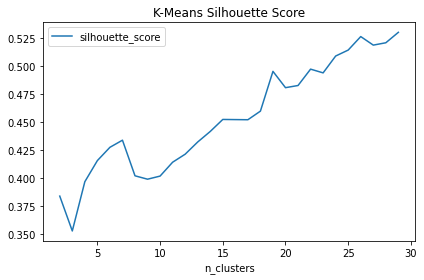

<Figure size 1080x432 with 0 Axes>

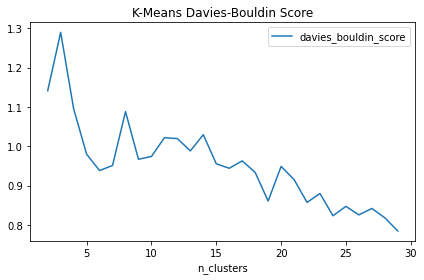

In [34]:
clusters_range=range(2, 30)
results=[]

for c in clusters_range:
    clusterer=KMeans(n_clusters=c, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)
    results.append([c,silhouette_avg,db_index])

result  =pd.DataFrame(results, columns=["n_clusters","silhouette_score","davies_bouldin_score"])
result = result.set_index('n_clusters')

print("Silhouette Coefficient: %0.3f" % result[result.index == n_clusters_]["silhouette_score"].max())
print("Davies Bouldin Coefficient: %0.3f" % result[result.index == n_clusters_]["davies_bouldin_score"].max())

plt.figure(figsize=(15, 6))
result[["silhouette_score"]].plot(kind = 'line')
plt.title('K-Means Silhouette Score')
plt.tight_layout()

plt.figure(figsize=(15, 6))
result[["davies_bouldin_score"]].plot(kind = 'line')
plt.title('K-Means Davies-Bouldin Score')
plt.tight_layout()

## Spectral Clustering

Silhouette Coefficient: 0.467
Davies Bouldin Coefficient: 0.853


<Figure size 1080x432 with 0 Axes>

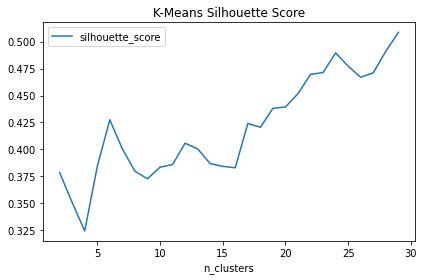

<Figure size 1080x432 with 0 Axes>

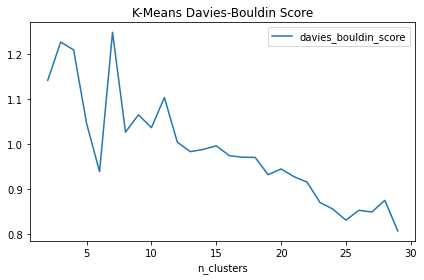

In [35]:
clusters_range=range(2, 30)
results=[]

for c in clusters_range:
    clusterer=SpectralClustering(n_clusters=c)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)
    results.append([c,silhouette_avg,db_index])

result  =pd.DataFrame(results, columns=["n_clusters","silhouette_score","davies_bouldin_score"])
result = result.set_index('n_clusters')

print("Silhouette Coefficient: %0.3f" % result[result.index == n_clusters_]["silhouette_score"].max())
print("Davies Bouldin Coefficient: %0.3f" % result[result.index == n_clusters_]["davies_bouldin_score"].max())

plt.figure(figsize=(15, 6))
result[["silhouette_score"]].plot(kind = 'line')
plt.title('K-Means Silhouette Score')
plt.tight_layout()

plt.figure(figsize=(15, 6))
result[["davies_bouldin_score"]].plot(kind = 'line')
plt.title('K-Means Davies-Bouldin Score')
plt.tight_layout()